Handwritten Digit Recognition by using Classification

In [1]:
# handwritten digit recognition by using classification
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# get general description of the data
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
# separating the labels
labels = data["label"]
labels

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64

In [5]:
# separating the features
features = data.drop("label", axis=1)

In [6]:
features

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


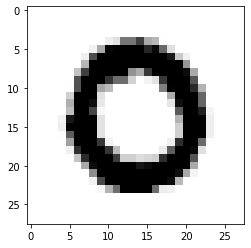

In [7]:
# 1st image
image = features.iloc[1].to_numpy().reshape(28, 28)
plt.imshow(image, cmap="gray_r");

In [8]:
# column standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit(features)
features_scaled = scaler.transform(features)

In [9]:
# applying dimensionality reduction by using pca
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
features_pca = pca.fit(features_scaled)
features_pca = pca.transform(features_scaled)
print(features.shape)
print(features_pca.shape)

(42000, 784)
(42000, 2)


In [10]:
print(features_pca)

[[-5.14047467 -5.22645563]
 [19.29230197  6.03293427]
 [-7.64450878 -1.70580865]
 ...
 [ 0.49536264  7.07614264]
 [ 2.30720597 -4.34470005]
 [-4.80769098  1.55906967]]


In [11]:
# constructing new dataframe
df = pd.DataFrame(features_pca, columns=["1st component", "2nd component"])
df["labels"] = labels.astype(float)
df

,1st component,2nd component,labels
0,-5.140475,-5.226456,1.0
1,19.292302,6.032934,0.0
2,-7.644509,-1.705809,1.0
3,-0.474191,5.836164,4.0
4,26.559546,6.024719,0.0
...,...,...,...
41995,13.678841,-1.350352,0.0
41996,-8.869575,-1.187314,1.0
41997,0.495363,7.076143,7.0
41998,2.307206,-4.344700,6.0


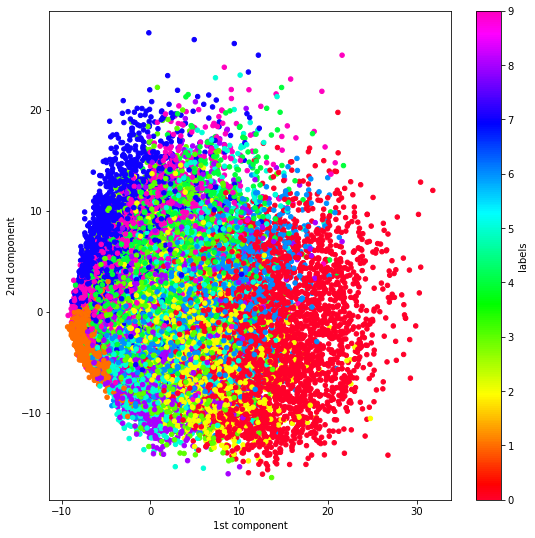

In [12]:
# visualize data after applying PCA
df.plot.scatter(x='1st component', y='2nd component', c='labels', cmap='gist_rainbow', figsize=(9,9), sharex=False);

In [13]:
# t-SNE (t Distributed Stochastic Neighbourhood Embedding) Dimensionality reduction
# random state is used for model reproduction
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)
features_embedded = tsne.fit_transform(features_scaled)
features_embedded

array([[-42.808105 , -34.29153  ],
       [ 11.889394 ,  49.3771   ],
       [-61.311604 ,   1.4951209],
       ...,
       [ 53.70529  , -13.197118 ],
       [-35.61228  ,  51.82878  ],
       [ 19.641361 , -40.694695 ]], dtype=float32)

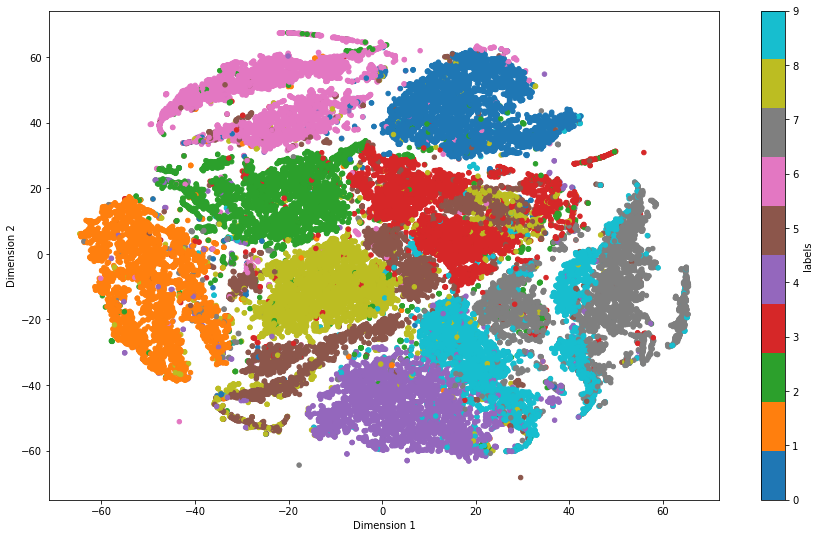

In [14]:
# visualize the data after t-SNE
df = pd.DataFrame(features_embedded, columns=["Dimension 1", "Dimension 2"])
df["labels"] = labels
df.plot.scatter(x='Dimension 1', y='Dimension 2', c='labels', cmap='tab10', figsize=(15,9), sharex=False);

Model Building Phase

In [15]:
# importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [16]:
# splitting data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:, 0:2], df["labels"], test_size=0.2, random_state=0, shuffle=True)

In [17]:
# validating the data splitting
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(33600, 2)
(33600,)
(8400, 2)
(8400,)


Naive Bayes Classification Algorithm

In [26]:
# using Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
classifier1 = GaussianNB()
classifier1.fit(X_train, Y_train)
Y_pred = classifier1.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f"Percentage accuracy for the Naive Bayes classifier on testing data is {accuracy}%")

Percentage accuracy for the Naive Bayes classifier on testing data is 79.55952380952381%


In [28]:
# report for Naive Bayes classifier
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       813
           1       0.94      0.99      0.96       961
           2       0.87      0.87      0.87       860
           3       0.69      0.85      0.76       863
           4       0.76      0.90      0.82       827
           5       0.80      0.16      0.27       756
           6       0.91      0.95      0.93       841
           7       0.75      0.71      0.73       899
           8       0.67      0.80      0.73       768
           9       0.63      0.68      0.66       812

    accuracy                           0.80      8400
   macro avg       0.80      0.79      0.77      8400
weighted avg       0.80      0.80      0.78      8400



KNN Classification Algorithm

In [29]:
from sklearn.neighbors import KNeighborsClassifier
# performing 10 cross validation
k_values = range(1, 30, 2)
accuracies = dict()
for i in k_values:
    classifier = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(classifier, X_train, Y_train, scoring="accuracy", cv=10)
    accuracies[i] = scores.mean()

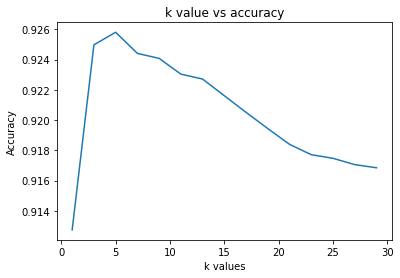

In [30]:
# plotting the graph of k value vs accuracy
plt.plot(k_values, accuracies.values())
plt.xlabel("k values")
plt.ylabel("Accuracy")
plt.title("k value vs accuracy")
plt.plot();

In [31]:
# from the above graph, we can see that the k=5 gives the maximum accuracy
optimal_k = max(zip(accuracies.values(), accuracies.keys()))[1]
optimal_k

5

In [32]:
# accuracy for k = 5 by using 10 cross validation
print(f"Percentage accuracy score for the optimal value of k for 10 cross validation data is {accuracies[optimal_k]*100}%")

Percentage accuracy score for the optimal value of k for 10 cross validation data is 92.58035714285715%


In [33]:
# performing testing on the 5-NN model by using testing data
classifier = KNeighborsClassifier(n_neighbors=optimal_k)
classifier.fit(X_train, Y_train)
Y_pred = classifier.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred) * 100
print(f"Percentage accuracy score for the optimal value of k on testing data is {accuracy}%")

Percentage accuracy score for the optimal value of k on testing data is 92.48809523809524%


In [34]:
# report for KNN classifier
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       813
           1       0.96      0.99      0.97       961
           2       0.92      0.94      0.93       860
           3       0.92      0.91      0.92       863
           4       0.92      0.90      0.91       827
           5       0.90      0.91      0.90       756
           6       0.94      0.97      0.96       841
           7       0.89      0.91      0.90       899
           8       0.95      0.88      0.92       768
           9       0.87      0.85      0.86       812

    accuracy                           0.92      8400
   macro avg       0.92      0.92      0.92      8400
weighted avg       0.92      0.92      0.92      8400

